# C3강현석_빅데이터분석(1) 1일차

## 회귀분석 실습

In [57]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

matplotlib.rc("font",family = "NanumGothic")
matplotlib.rc("axes",unicode_minus = False)

df_raw = pd.read_csv("DIABETES.csv", encoding = 'euc-kr')
df_raw.head()


,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [58]:
df_raw.isnull().sum()

Y              0
AGE            0
GENDER         0
BMI            0
BP             0
CHOLESTEROL    0
LDL            0
HDL            0
TCH            0
LTG            0
GLUCOSE        0
dtype: int64

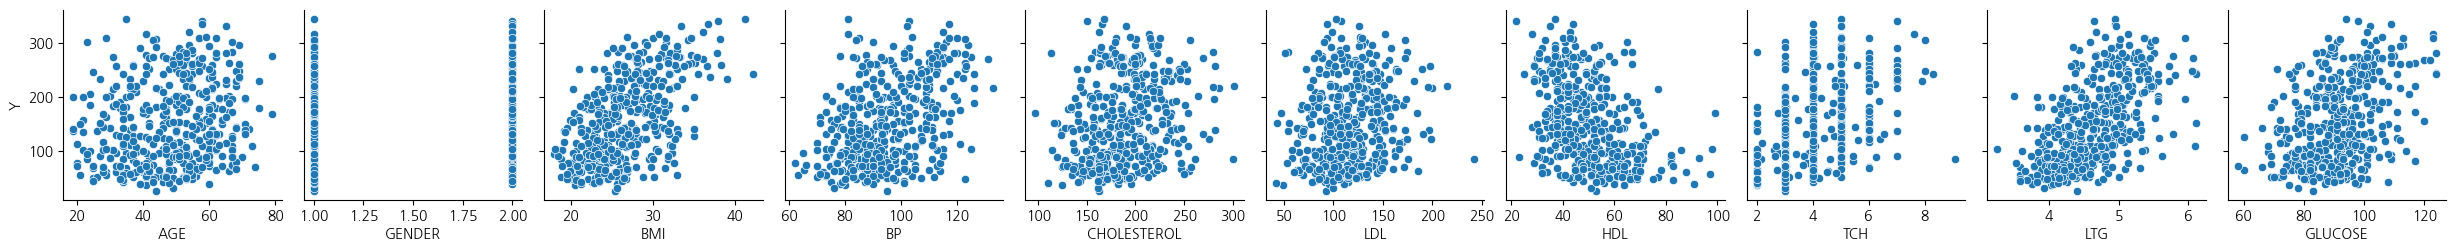

In [59]:
sns.pairplot(df_raw, y_vars="Y",x_vars=["AGE","GENDER","BMI","BP","CHOLESTEROL",
                                        "LDL","HDL","TCH","LTG","GLUCOSE"])

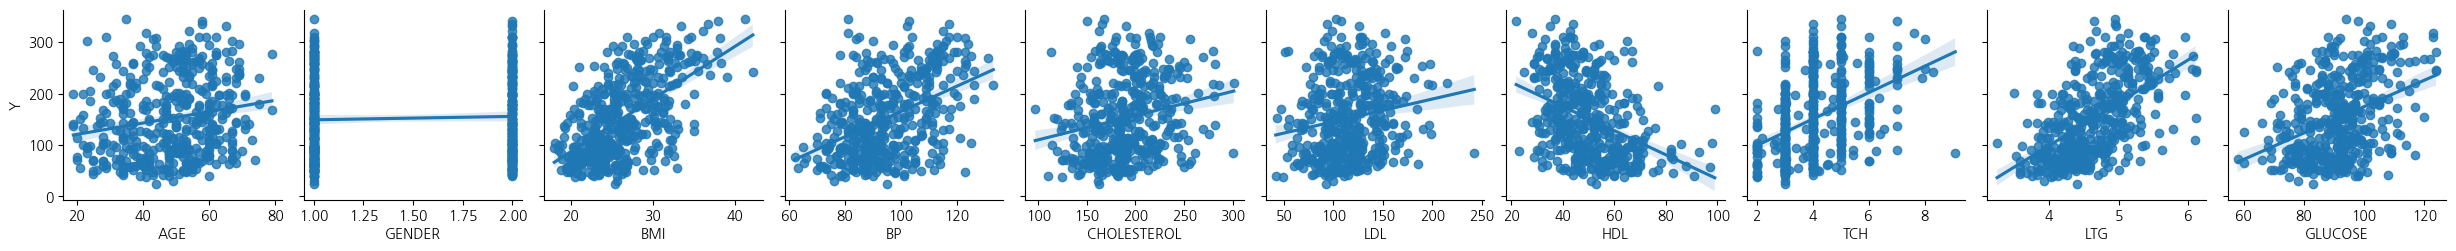

In [60]:
sns.pairplot(df_raw, y_vars="Y",x_vars=["AGE","GENDER","BMI","BP","CHOLESTEROL",
                                        "LDL","HDL","TCH","LTG","GLUCOSE"],kind ="reg")


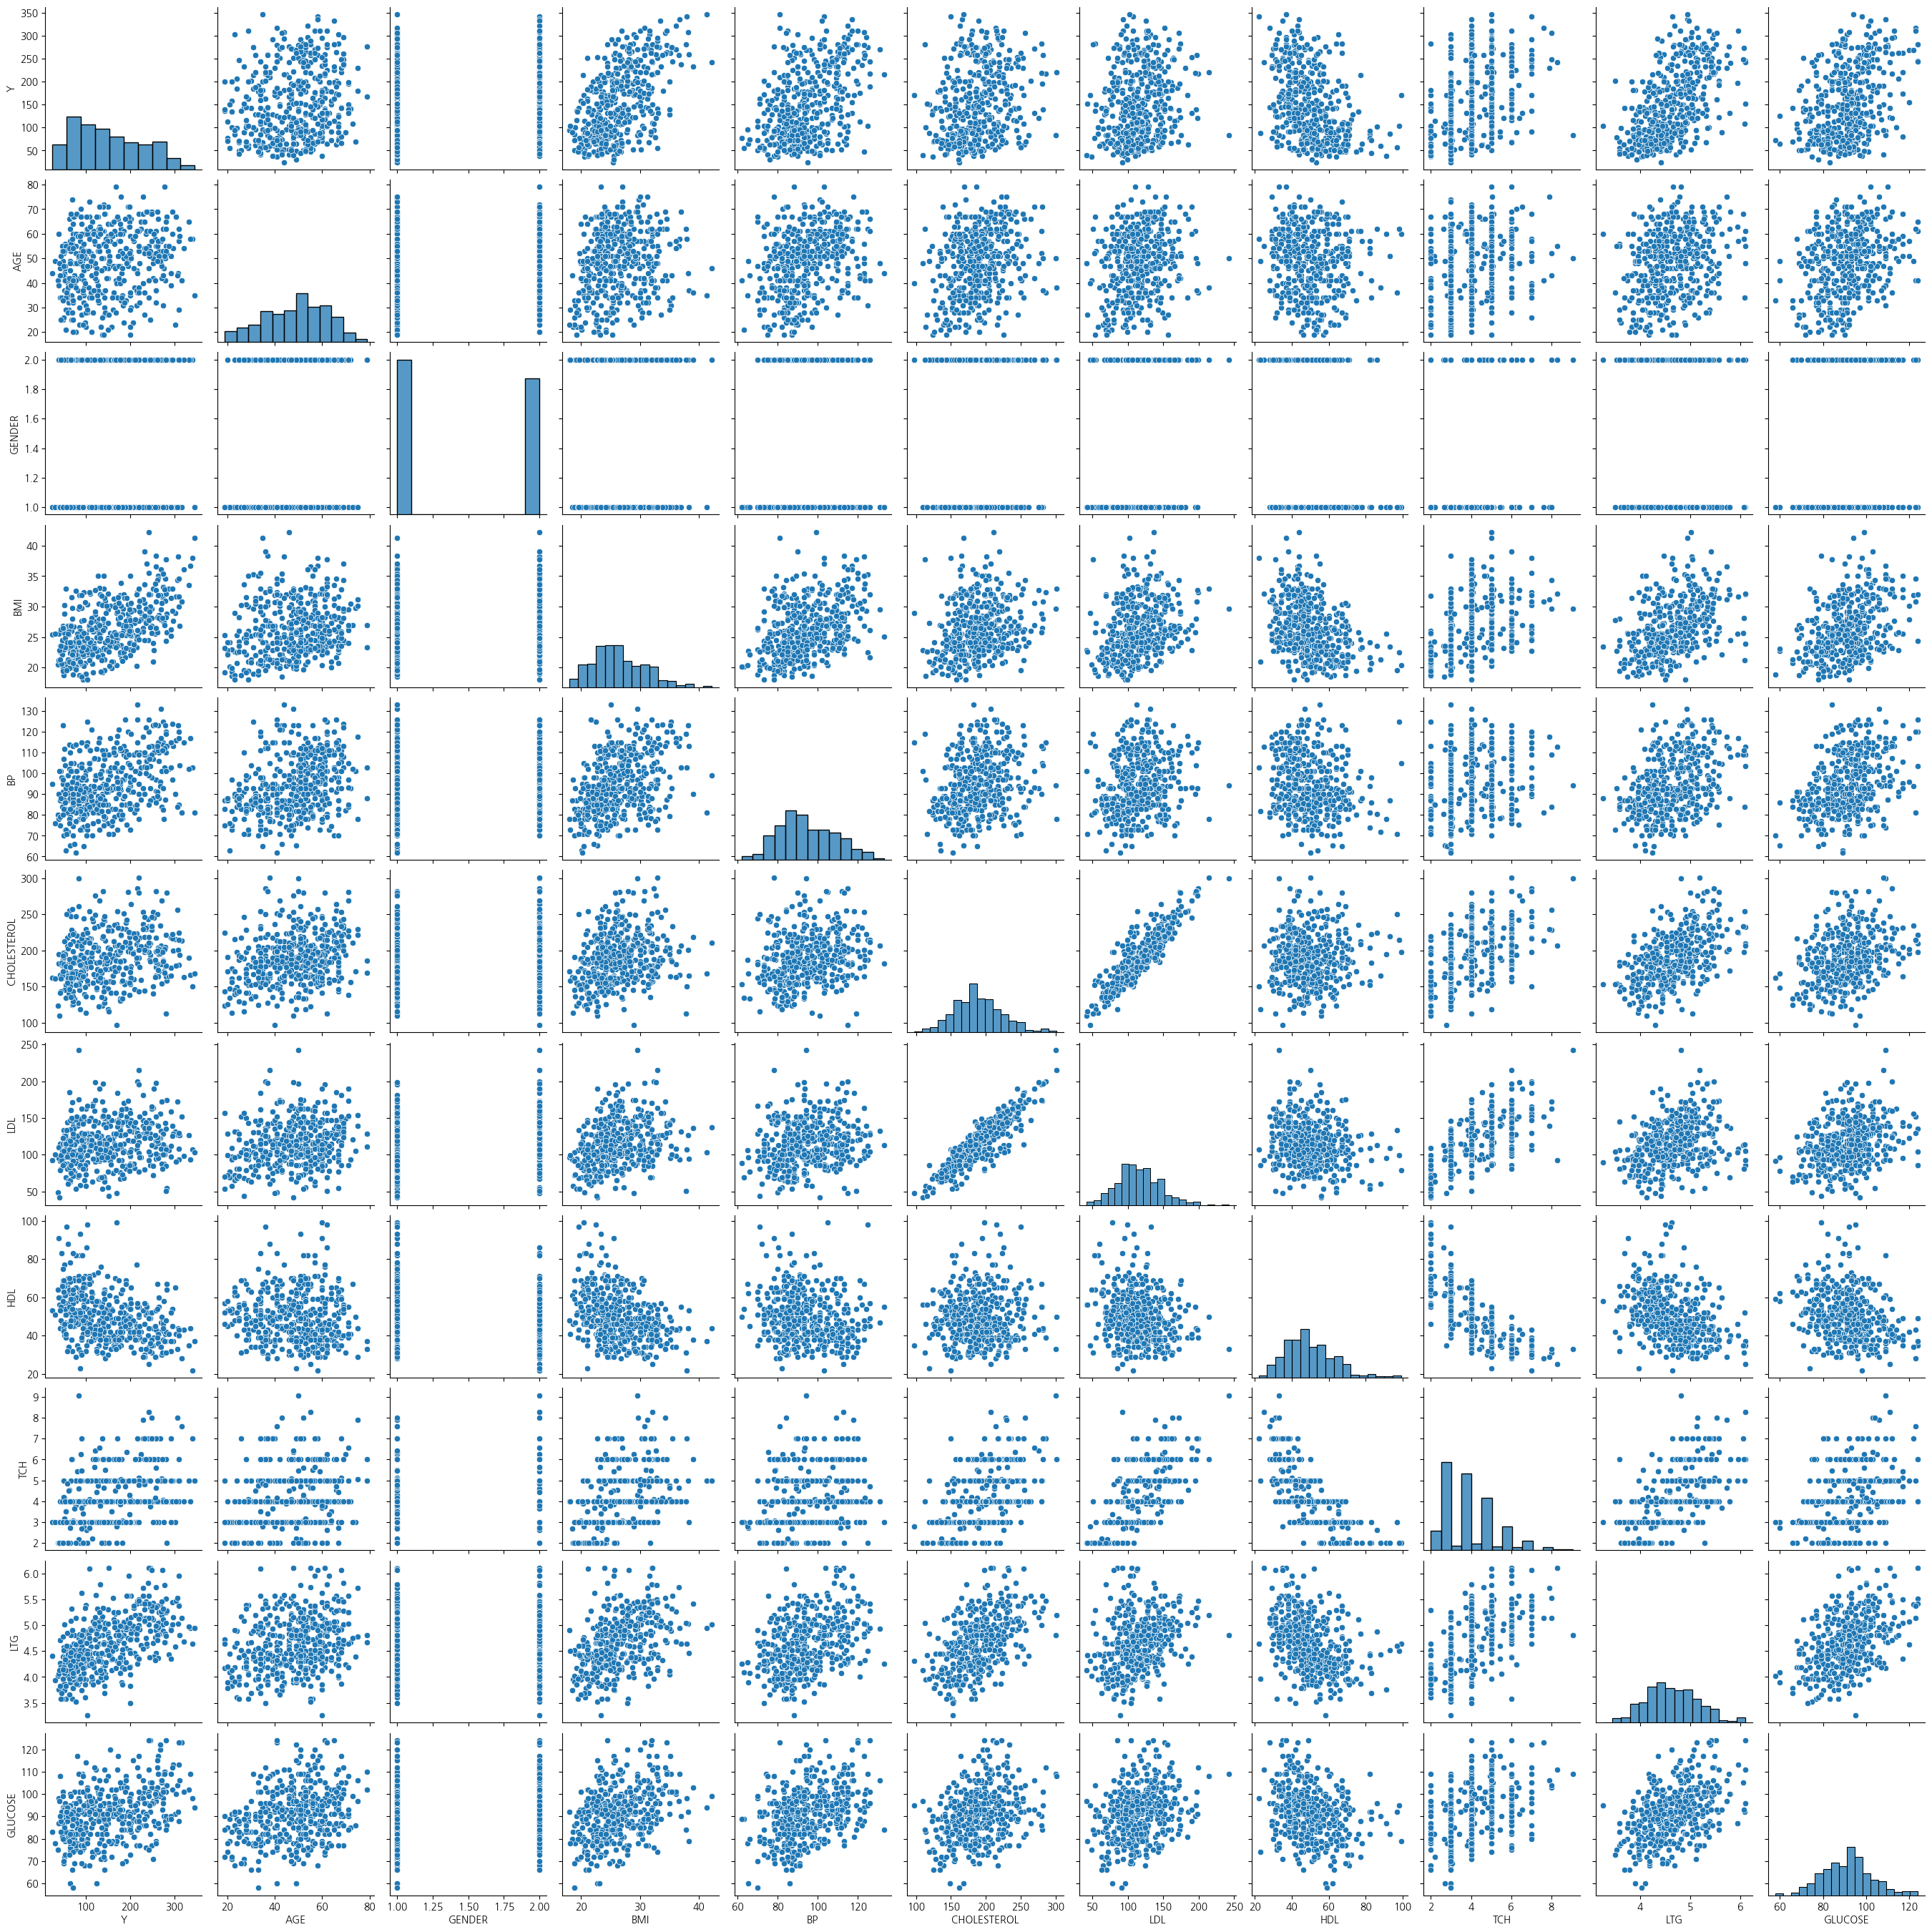

In [61]:
sns.pairplot(df_raw)

In [62]:
df_raw.corr().round(3)

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
Y,1.000,0.188,0.043,0.586,0.441,0.212,0.174,-0.395,0.430,0.566,0.382
AGE,0.188,1.000,0.174,0.185,0.335,0.260,0.219,-0.075,0.204,0.271,0.302
GENDER,0.043,0.174,1.000,0.088,0.241,0.035,0.143,-0.379,0.332,0.150,0.208
BMI,0.586,0.185,0.088,1.000,0.395,0.250,0.261,-0.367,0.414,0.446,0.389
BP,0.441,0.335,0.241,0.395,1.000,0.242,0.186,-0.179,0.258,0.393,0.390
CHOLESTEROL,0.212,0.260,0.035,0.250,0.242,1.000,0.897,0.052,0.542,0.516,0.326
LDL,0.174,0.219,0.143,0.261,0.186,0.897,1.000,-0.196,0.660,0.318,0.291
HDL,-0.395,-0.075,-0.379,-0.367,-0.179,0.052,-0.196,1.000,-0.738,-0.399,-0.274
TCH,0.430,0.204,0.332,0.414,0.258,0.542,0.660,-0.738,1.000,0.618,0.417
LTG,0.566,0.271,0.150,0.446,0.393,0.516,0.318,-0.399,0.618,1.000,0.465


BMI와 LTG가 높은 선형관계를 갖고 있다.

In [63]:
df_train, df_test = train_test_split(df_raw, test_size=0.3, random_state=1234)
print("train dzta size : {}".format(df_train.shape))
print("test dzta size : {}".format(df_test.shape))

train dzta size : (309, 11)
test dzta size : (133, 11)


In [64]:
reg_model = smf.ols(formula='Y ~ AGE + GENDER + BMI + BP + CHOLESTEROL + \
                 LDL + HDL + TCH + LTG + GLUCOSE', data=df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     33.24
Date:                Mon, 15 May 2023   Prob (F-statistic):           5.68e-43
Time:                        14:53:36   Log-Likelihood:                -1668.9
No. Observations:                 309   AIC:                             3360.
Df Residuals:                     298   BIC:                             3401.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -334.9870     86.627     -3.867      

No.Observaions(분석 자료 수) : 309
Df Residuals(잔차 자유도) : 298
Df Model(모델 자유도) : 10

분산분석결과
Prob : p값이 유의수준 0.05보다 작으므로 회귀모델로서 유의

설명의
Adj. R-squared = 51%

회귀계수 검정 
--> BMI, BP, LTG의 P값이 유의수준 0.05보다 작으므로 유의

## 설명변수 간의 다중공선성 확인

In [65]:
df_train_x = df_train.drop('Y',axis =1)
df_train_x_const = add_constant(df_train_x)

df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values,i)\
                for i in range(df_train_x_const.shape[1])]

df_vif.sort_values("VIF",ascending=True).round(2)



,variable,VIF
1,AGE,1.22
2,GENDER,1.23
4,BP,1.46
3,BMI,1.49
10,GLUCOSE,1.52
8,TCH,8.76
9,LTG,10.49
7,HDL,16.56
6,LDL,38.83
5,CHOLESTEROL,60.66


LTG와 HDL과 LDL과 CHOLESTEROL은 수치가 10보다 크다. 이는 다른 변수와 상관관계가 매우 높아서 다중선성이 발생할
수 있다. 따라서 모델에서 제외를 검토해야한다. 가장 큰 CHOLESTEROL을 먼저 제거한다.

In [66]:
reg_model = smf.ols(formula='Y ~ AGE + GENDER + BMI + BP +\
                 LDL + HDL + TCH + LTG + GLUCOSE', data=df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     36.64
Date:                Mon, 15 May 2023   Prob (F-statistic):           2.18e-43
Time:                        14:53:36   Log-Likelihood:                -1669.8
No. Observations:                 309   AIC:                             3360.
Df Residuals:                     299   BIC:                             3397.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -237.2111     46.686     -5.081      0.0

In [67]:
df_train_x = df_train.drop(['Y',"CHOLESTEROL"],axis =1)
df_train_x_const = add_constant(df_train_x)

df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values,i)\
                for i in range(df_train_x_const.shape[1])]

df_vif.sort_values("VIF",ascending=True).round(2)

,variable,VIF
1,AGE,1.22
2,GENDER,1.23
4,BP,1.45
3,BMI,1.49
9,GLUCOSE,1.52
8,LTG,2.16
5,LDL,2.70
6,HDL,3.57
7,TCH,7.55
0,const,225.32


모든 변수의 VIF값이 10 미만이므로, 다중공선성 해결

# 유의한 설명변수 확인

P값이 가장 큰 GENDER 제거

In [68]:
reg_model = smf.ols(formula='Y ~ AGE + BMI + BP +\
                 LDL + HDL + TCH + LTG + GLUCOSE', data=df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     37.65
Date:                Mon, 15 May 2023   Prob (F-statistic):           3.87e-41
Time:                        14:53:36   Log-Likelihood:                -1677.2
No. Observations:                 309   AIC:                             3372.
Df Residuals:                     300   BIC:                             3406.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -283.3139     46.135     -6.141      0.0

P값이 가장 큰 TCH 제거

In [69]:
reg_model = smf.ols(formula='Y ~ AGE + BMI + BP +\
                 LDL + HDL  + LTG + GLUCOSE', data=df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     43.17
Date:                Mon, 15 May 2023   Prob (F-statistic):           5.76e-42
Time:                        14:53:36   Log-Likelihood:                -1677.2
No. Observations:                 309   AIC:                             3370.
Df Residuals:                     301   BIC:                             3400.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -281.8163     45.332     -6.217      0.0

P값이 가장 큰 GLUCOSE 제거

In [70]:
reg_model = smf.ols(formula='Y ~ AGE + BMI + BP +\
                 LDL + HDL  + LTG', data=df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     50.39
Date:                Mon, 15 May 2023   Prob (F-statistic):           9.47e-43
Time:                        14:53:36   Log-Likelihood:                -1677.4
No. Observations:                 309   AIC:                             3369.
Df Residuals:                     302   BIC:                             3395.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -271.7743     42.481     -6.397      0.0

값이 가장 큰 AGE 제거

In [71]:
reg_model = smf.ols(formula='Y ~ BMI + BP +\
                 LDL + HDL  + LTG', data=df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     60.48
Date:                Mon, 15 May 2023   Prob (F-statistic):           1.45e-43
Time:                        14:53:36   Log-Likelihood:                -1677.7
No. Observations:                 309   AIC:                             3367.
Df Residuals:                     303   BIC:                             3390.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -271.5840     42.443     -6.399      0.0

마지막으로 LDL제거

In [72]:
reg_model = smf.ols(formula='Y ~ BMI + BP + HDL  + LTG', data=df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     74.53
Date:                Mon, 15 May 2023   Prob (F-statistic):           5.83e-44
Time:                        14:53:36   Log-Likelihood:                -1679.0
No. Observations:                 309   AIC:                             3368.
Df Residuals:                     304   BIC:                             3387.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -276.7450     42.440     -6.521      0.0

In [73]:
df_train_x = df_train[["BMI","BP","HDL","LTG"]]
df_train_x_const = add_constant(df_train_x)

df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values,i)\
                for i in range(df_train_x_const.shape[1])]

df_vif.sort_values("VIF",inplace=True)
df_vif.round(2)

,variable,VIF
3,HDL,1.26
2,BP,1.27
1,BMI,1.40
4,LTG,1.45
0,const,178.32


다중공선성을 재확인 하였지만 문제는 없다.

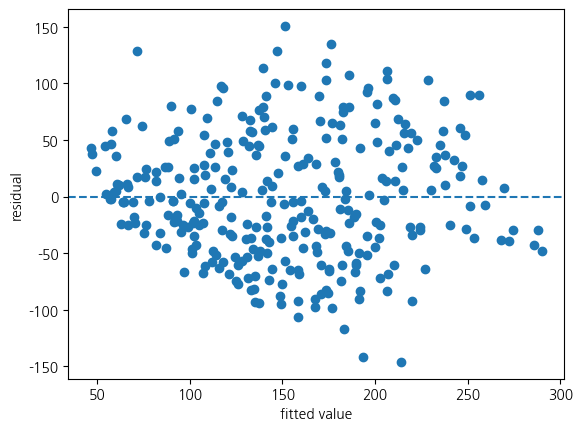

In [74]:
plt.scatter(reg_result.fittedvalues,reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y=0,linestyle="--")

잔차가 y=0을 기준으로 Random하게 산포되어 있으므로 등분산성을 만족한다.

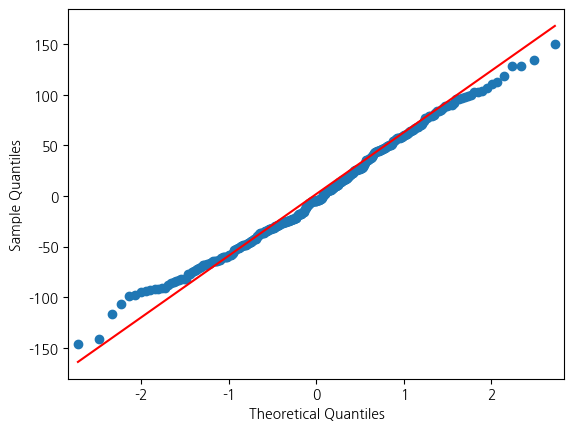

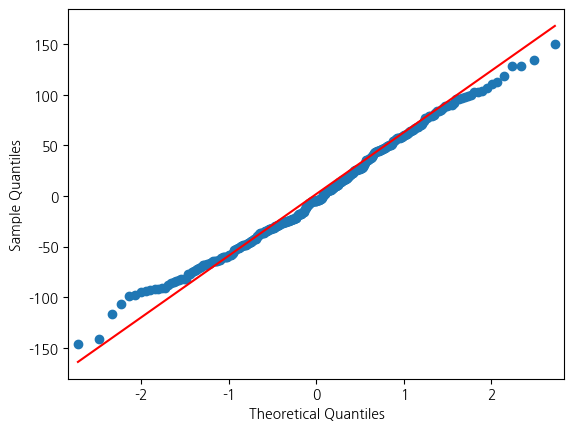

In [75]:
qqplot(reg_result.resid,line="q")

정규분포 직선(적색 선)을 중심으로 분포하므로 정규분포를 따름

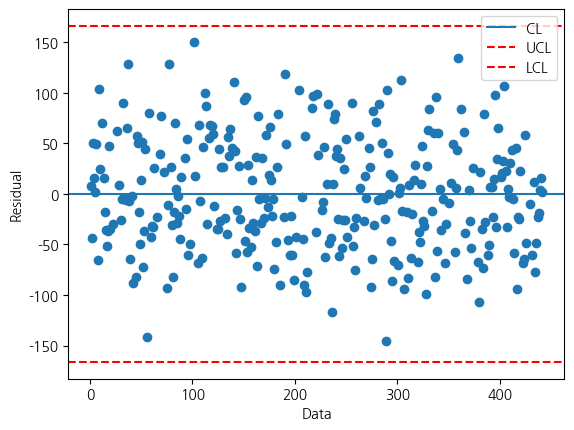

In [76]:
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel("Data")
plt.ylabel("Residual")
plt.axhline(y=0,linestyle="-",label="CL")
plt.axhline(y=3*np.std(reg_result.resid),linestyle="--",color="red",label="UCL")
plt.axhline(y=-3*np.std(reg_result.resid),linestyle="dashed",color="red",label="LCL")
plt.legend()

잔차가 y=0을 기준으로 관리상하한을 벗어나지 않고, Random하게 산포되어 있으므로 독립성을 만족

In [77]:
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수: ",r2_score(df_train["Y"],train_pred))
print("test data의 결정계수: ",r2_score(df_test["Y"],test_pred))

train data의 결정계수:  0.4951275264437487
test data의 결정계수:  0.48024016381924006


In [78]:
df_train_y = df_train["Y"]
df_train_x = df_train.drop("Y",axis=1)

model = LinearRegression()

rfe = RFE(estimator= model, n_features_to_select=4).fit(df_train_x,df_train_y)

selected_cols = df_train_x.columns[rfe.support_]

removed_cols = df_train_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols))
print("removed Variables : {}".format(removed_cols))

Selected Variables : Index(['GENDER', 'BMI', 'TCH', 'LTG'], dtype='object')
removed Variables : Index(['AGE', 'BP', 'CHOLESTEROL', 'LDL', 'HDL', 'GLUCOSE'], dtype='object')


GENDER, BMI, TCH, LTG 선택됨

In [79]:
reg_model = smf.ols(formula='Y ~ GENDER + BMI + TCH + LTG', data=df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     68.98
Date:                Mon, 15 May 2023   Prob (F-statistic):           1.70e-41
Time:                        14:53:37   Log-Likelihood:                -1684.8
No. Observations:                 309   AIC:                             3380.
Df Residuals:                     304   BIC:                             3398.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -279.0588     33.934     -8.224      0.0

No.Observaions(분석 자료 수) : 309
Df Residuals(잔차 자유도) : 304
Df Model(모델 자유도) : 4

분산분석결과
Prob : p값이 유의수준 0.05보다 작으므로 회귀모델로서 적합

설명력
Adj. R-squared = 47%
모델을 통하여 47%를 설명할 수 있음

회귀계수 검정 
--> TCH는 P값이 0.05보다 크므로 유의하지 않음

#### 수작업으로 변수 선택한 내용과 다르다

<Axes: >

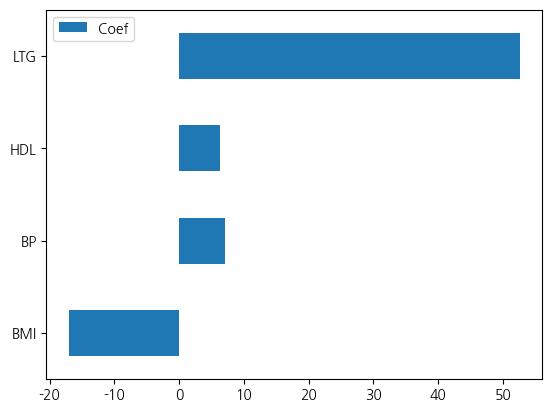

In [80]:
df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:]},
                          index = ["BMI","BP","HDL","LTG"])
df_reg_coef.plot.barh(y = "Coef")

LTG, HDL, BP는 커질 수록 당뇨병 발생확률이 증가하고 BMI가 낮을수록 당뇨병 발생확률이 증가한다.